In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置matplotlib以正确显示中文，避免乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 读取农产品数据
df_market = pd.read_csv('农产品销售数据.csv')
df_cleaned = df_market.drop(columns=['提取时间'])
print("数据加载与基础清洗完成！")

数据加载与基础清洗完成！


# 新知识点：认识Series

In [3]:
print("\n--- 探索Pandas的核心结构 ---")
# 我们用中括号里加列名的方式，来从DataFrame中选取一列
produce_series = df_cleaned['品种']

print("我们成功选取了'品种'这一列，它的类型是：")
# 使用type()函数可以查看一个变量的数据类型
print(type(produce_series))
print(type(df_cleaned))
print("\nSeries的前5行内容预览：")
produce_series.head(20)


--- 探索Pandas的核心结构 ---
我们成功选取了'品种'这一列，它的类型是：
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>

Series的前5行内容预览：


0        猕猴桃
1        红毛丹
2        火龙果
3         木瓜
4         芒果
5     龙眼(桂圆)
6         菠萝
7         香蕉
8         柠檬
9         柚子
10       橘、柑
11        腰果
12        杏仁
13       开心果
14        核桃
15       大白菜
16       哈密瓜
17        西瓜
18       菠萝蜜
19        山竹
Name: 品种, dtype: object

# 知识点：条件筛选 
## 任务1: 筛选出所有大宗价高于20元的农产品

In [4]:
# 首先，我们选取'大宗价'这一列，得到一个价格Series
# 然后，对这个Series进行判断 > 20
# 重点：下面这行代码返回的是一个由True和False组成的布尔Series
high_price_condition = df_cleaned['大宗价'] > 20
print("价格是否高于20的布尔Series预览：")
high_price_condition.head(20)

价格是否高于20的布尔Series预览：


0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12     True
13     True
14     True
15    False
16    False
17    False
18    False
19     True
Name: 大宗价, dtype: bool

In [5]:
high_price_df = df_cleaned[high_price_condition]
# 通常，我们会把上面两步合并为一步，代码更简洁：
# high_price_df = df_cleaned[df_cleaned['大宗价'] > 20]

print("\n成功筛选出高价农产品：")
print(high_price_df.head(10))


成功筛选出高价农产品：
     品种             批发市场   最高价   最低价   大宗价    单位
1   红毛丹  山西省太原市河西农产品有限公司  40.0  24.0  32.0  元/公斤
11   腰果  山西省太原市河西农产品有限公司  90.0  56.0  73.0  元/公斤
12   杏仁  山西省太原市河西农产品有限公司  80.0  64.0  72.0  元/公斤
13  开心果  山西省太原市河西农产品有限公司  98.0  74.0  86.0  元/公斤
14   核桃  山西省太原市河西农产品有限公司  30.0  16.0  23.0  元/公斤
19   山竹  山西省太原市河西农产品有限公司  26.0  18.0  22.0  元/公斤
21   枇杷  山西省太原市河西农产品有限公司  30.0  28.0  29.0  元/公斤
22   榴莲  山西省太原市河西农产品有限公司  54.0  36.0  45.0  元/公斤
79  黑木耳  山西省太原市河西农产品有限公司  60.0  52.0  56.0  元/公斤
92   大枣  山西省太原市河西农产品有限公司  30.0  22.0  26.0  元/公斤


## 任务2: 筛选太原市场中，大宗价高于15元的农产品

In [6]:
# 难点：当有多个条件时，每个条件都需要用圆括号()括起来，
# 并且使用 & 符号代表“并且”
# 使用 | 符号代表“或者”
multi_condition_df1 = df_cleaned[(df_cleaned['批发市场']=='山西省太原市河西农产品有限公司') & (df_cleaned['大宗价'] > 20)]
multi_condition_df2 = df_cleaned[(df_cleaned['最高价'] > 90) | (df_cleaned['最低价'] < 4)]
print("\n同时满足两个条件的农产品：")
multi_condition_df1



同时满足两个条件的农产品：


,品种,批发市场,最高价,最低价,大宗价,单位
1,红毛丹,山西省太原市河西农产品有限公司,40.0,24.0,32.0,元/公斤
11,腰果,山西省太原市河西农产品有限公司,90.0,56.0,73.0,元/公斤
12,杏仁,山西省太原市河西农产品有限公司,80.0,64.0,72.0,元/公斤
13,开心果,山西省太原市河西农产品有限公司,98.0,74.0,86.0,元/公斤
14,核桃,山西省太原市河西农产品有限公司,30.0,16.0,23.0,元/公斤
19,山竹,山西省太原市河西农产品有限公司,26.0,18.0,22.0,元/公斤
21,枇杷,山西省太原市河西农产品有限公司,30.0,28.0,29.0,元/公斤
22,榴莲,山西省太原市河西农产品有限公司,54.0,36.0,45.0,元/公斤
79,黑木耳,山西省太原市河西农产品有限公司,60.0,52.0,56.0,元/公斤
92,大枣,山西省太原市河西农产品有限公司,30.0,22.0,26.0,元/公斤


In [7]:
print("\n满足两个条件之一的农产品：")
multi_condition_df2


满足两个条件之一的农产品：


,品种,批发市场,最高价,最低价,大宗价,单位
2,火龙果,山西省太原市河西农产品有限公司,5.6,3.6,4.60,元/公斤
7,香蕉,山西省太原市河西农产品有限公司,4.4,3.4,3.90,元/公斤
13,开心果,山西省太原市河西农产品有限公司,98.0,74.0,86.00,元/公斤
15,大白菜,山西省太原市河西农产品有限公司,1.8,1.8,1.80,元/公斤
17,西瓜,山西省太原市河西农产品有限公司,6.0,2.2,4.10,元/公斤
...,...,...,...,...,...,...
740,茄子,上海市江桥批发市场经营管理有限公司,6.5,2.4,3.70,元/公斤
741,黄瓜,上海市江桥批发市场经营管理有限公司,4.2,2.2,3.00,元/公斤
742,西葫芦,上海市江桥批发市场经营管理有限公司,6.0,3.4,4.60,元/公斤
743,南瓜,上海市江桥批发市场经营管理有限公司,2.0,1.4,1.60,元/公斤


## 任务3: 使用isin()筛选出山西和上海两个市场的数据 

In [8]:
# 定义一个包含我们感兴趣的市场名称的列表
target_markets = ['山西省太原市河西农产品有限公司', '上海市江桥批发市场经营管理有限公司']

# 使用 .isin() 方法，对'批发市场'这个Series进行判断
isin_df = df_cleaned[df_cleaned['批发市场'].isin(target_markets)]

print("同时筛选多个市场的数据：")
isin_df

同时筛选多个市场的数据：


,品种,批发市场,最高价,最低价,大宗价,单位
0,猕猴桃,山西省太原市河西农产品有限公司,7.0,4.6,5.80,元/公斤
1,红毛丹,山西省太原市河西农产品有限公司,40.0,24.0,32.00,元/公斤
2,火龙果,山西省太原市河西农产品有限公司,5.6,3.6,4.60,元/公斤
3,木瓜,山西省太原市河西农产品有限公司,11.0,7.0,9.00,元/公斤
4,芒果,山西省太原市河西农产品有限公司,12.0,8.0,10.00,元/公斤
...,...,...,...,...,...,...
743,南瓜,上海市江桥批发市场经营管理有限公司,2.0,1.4,1.60,元/公斤
744,冬瓜,上海市江桥批发市场经营管理有限公司,1.5,1.2,1.35,元/公斤
745,豆角,上海市江桥批发市场经营管理有限公司,6.5,4.8,5.50,元/公斤
746,平菇,上海市江桥批发市场经营管理有限公司,10.0,9.0,9.40,元/公斤


## 任务4: 数据可视化
可视化任务1: 绘制大宗价的分布直方图

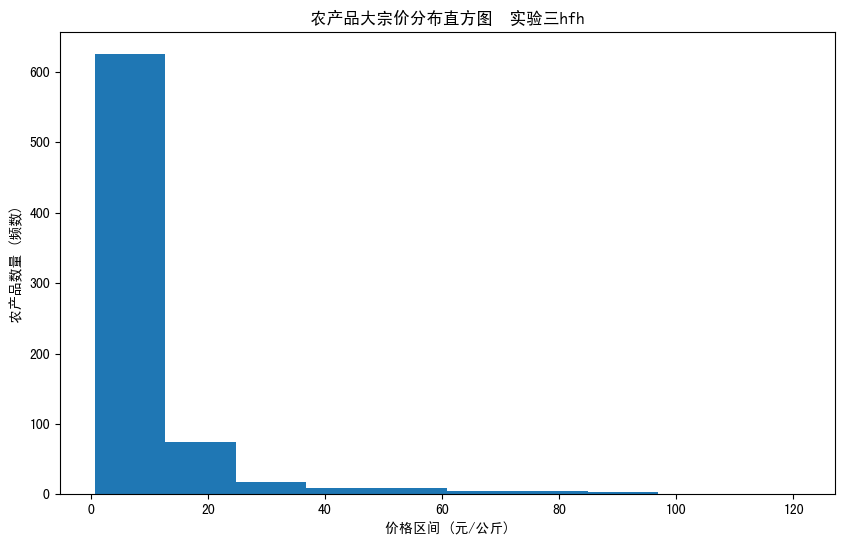

In [9]:
# 重点API讲解: .plot(kind='hist') 用于绘制直方图
# bins=20 参数的意思是把价格范围从最低到最高分成20个“相同的桶”(区间)，然后统计每个桶里有多少个数据
df_cleaned['大宗价'].plot(kind='hist', bins=10, figsize=(10, 6), title='农产品大宗价分布直方图  实验三hfh')

plt.xlabel('价格区间 (元/公斤)') # 设置X轴标签
plt.ylabel('农产品数量 (频数)') # 设置Y轴标签
plt.show() # 显示图表

In [10]:
# 加载新的数据集：全球电子游戏销量数据
df_games = pd.read_csv('vgsales_cn.csv')
print("\n游戏销量数据加载成功！")
df_games.head()


游戏销量数据加载成功！


,排名,名称,年份,发行商,北美销量(百万),欧洲销量(百万),日本销量(百万),其他地区销量(百万),全球销量(百万),类型,平台
0,1,Wii Sports,2006.0,Nintendo,41.49,29.02,3.77,8.46,82.74,体育,任天堂Wii
1,2,Super Mario Bros.,1985.0,Nintendo,29.08,3.58,6.81,0.77,40.24,平台跳跃,任天堂红白机
2,3,Mario Kart Wii,2008.0,Nintendo,15.85,12.88,3.79,3.31,35.82,竞速,任天堂Wii
3,4,Wii Sports Resort,2009.0,Nintendo,15.75,11.01,3.28,2.96,33.00,体育,任天堂Wii
4,5,Pokemon Red/Pokemon Blue,1996.0,Nintendo,11.27,8.89,10.22,1.00,31.37,角色扮演,任天堂Game Boy


### 可视化任务2: 探索北美销量与欧洲销量的关系

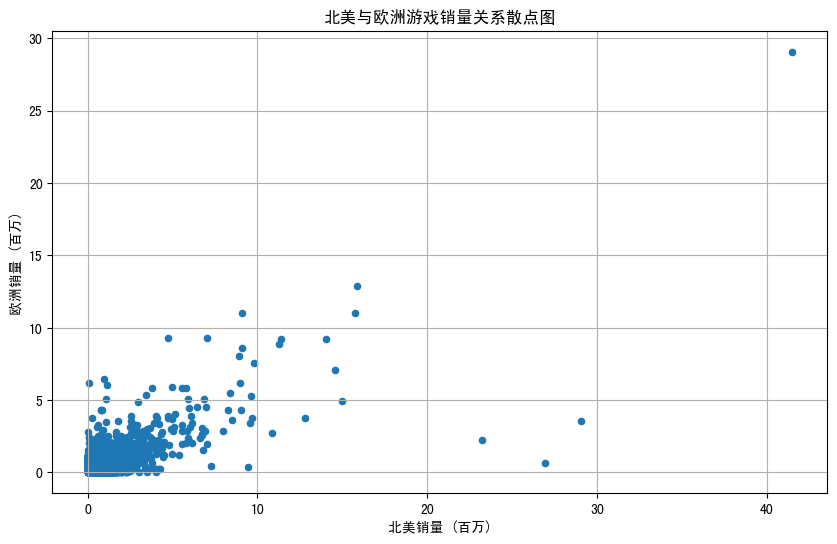

In [11]:
# 重点API讲解: .plot(kind='scatter', x='x轴列名', y='y轴列名')
# 每个点代表一款游戏，它的x坐标是北美销量，y坐标是欧洲销量
df_games.plot(kind='scatter', x='北美销量(百万)', y='欧洲销量(百万)', figsize=(10, 6), title='北美与欧洲游戏销量关系散点图')

plt.xlabel('北美销量 (百万)') # 设置X轴标签
plt.ylabel('欧洲销量 (百万)') # 设置Y轴标签
plt.grid(True) # 给图表加上网格线，方便观察
plt.show() # 显示图表